In [2]:
import pandas as pd
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_toxic = pd.read_csv(r"/content/drive/MyDrive/toxicity.csv",index_col='id')

In [4]:
data_toxic.head()

,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
id,,,,,,,,,,,,,,,,,,,,,
364507,0.0,"NONE. The congress makes the laws, and the Ex...",0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,139551,approved,0,0,0,0,0,0.0,0,4
364508,0.0,Is there any research to tell us whether oxybe...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,139639,approved,0,0,0,1,0,0.0,0,4
364509,0.0,"OT, You are definitely on to something with yo...",0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,139771,approved,0,0,0,1,0,0.0,0,4
364511,0.4,Not once does anyone mention that the shooter ...,0.0,0.2,0.4,0.3,0.0,0.0,0.0,0.0,...,139749,approved,0,0,0,0,0,0.0,5,10
364512,0.0,"OS, I think the $12,000.00 proves ToTL's point.",0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,139764,approved,0,0,0,1,0,0.0,0,4


In [5]:
data_toxic.shape

(100000, 44)

In [6]:
data_toxic.isna().sum()

target                                     0
comment_text                               0
severe_toxicity                            0
obscene                                    0
identity_attack                            0
insult                                     0
threat                                     0
asian                                  79902
atheist                                79902
bisexual                               79902
black                                  79902
buddhist                               79902
christian                              79902
female                                 79902
heterosexual                           79902
hindu                                  79902
homosexual_gay_or_lesbian              79902
intellectual_or_learning_disability    79902
jewish                                 79902
latino                                 79902
male                                   79902
muslim                                 79902
other_disa

In [7]:
data_toxic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 364507 to 485895
Data columns (total 44 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   target                               100000 non-null  float64
 1   comment_text                         100000 non-null  object 
 2   severe_toxicity                      100000 non-null  float64
 3   obscene                              100000 non-null  float64
 4   identity_attack                      100000 non-null  float64
 5   insult                               100000 non-null  float64
 6   threat                               100000 non-null  float64
 7   asian                                20098 non-null   float64
 8   atheist                              20098 non-null   float64
 9   bisexual                             20098 non-null   float64
 10  black                                20098 non-null   float64
 11  buddhist

In [8]:
#Check for shape of the data
print("Shape of Data :{}".format(data_toxic.shape))

Shape of Data :(100000, 44)


# Exploratory Data Analysis

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


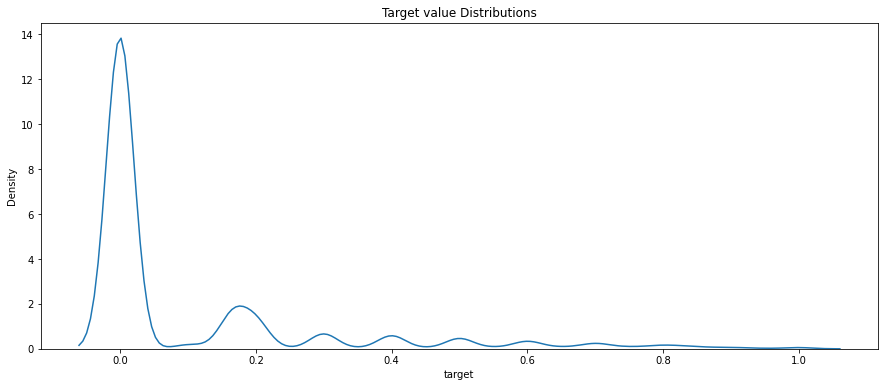

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
#Target Data
plt.figure(figsize=(15,6))
plt.title("Target value Distributions")
sns.distplot(data_toxic['target'], kde=True, hist=False, bins=240, label='target')
plt.show()

Percentage of Toxic and Non-Toxic in the target class

<ipython-input-27-02d7e34dc92c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['target'] = data_toxic['target'].apply(lambda x:"Non-toxic" if x < 0.5 else"toxic")


Text(0.5, 1.0, 'Percentage of non-toxic and toxic comments')

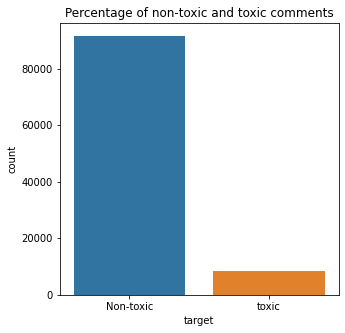

In [27]:
temp = data_toxic['target']
temp['target'] = data_toxic['target'].apply(lambda x:"Non-toxic" if x < 0.5 else"toxic")
fig, ax = plt.subplots(1,1,figsize=(5,5))
total = float(len(temp))
# Plot the count plot.
cntplot = sns.countplot(x=temp['target'])
cntplot.set_title('Percentage of non-toxic and toxic comments')

The Dataset is imbalanced.Non-toxic class is very higher than toxic comments

# Preprocessing the Text

In [9]:
#import neccessary libraries for preprocessing
import nltk
from nltk.stem import SnowballStemmer, PorterStemmer
from nltk.corpus import stopwords
import re

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = text.lower()
    text = re.sub('[^A-Za-z0-9]+', ' ', text)
    
    x = text.split()
    new_text = []
    
    for word in x:
        if word not in stop_words:
            new_text.append(stemmer.stem(word))
            
    text = ' '.join(new_text)
    return text

In [12]:
data_toxic['preprocessed_text'] = data_toxic['comment_text'].apply(preprocess)

In [13]:
data_toxic

,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,preprocessed_text
id,,,,,,,,,,,,,,,,,,,,,
364507,0.000000,"NONE. The congress makes the laws, and the Ex...",0.0,0.0,0.000000,0.000000,0.0,NaN,NaN,NaN,...,approved,0,0,0,0,0,0.0,0,4,none congress make law execut offic follow ex ...
364508,0.000000,Is there any research to tell us whether oxybe...,0.0,0.0,0.000000,0.000000,0.0,NaN,NaN,NaN,...,approved,0,0,0,1,0,0.0,0,4,research tell us whether oxybenaon get wash sh...
364509,0.000000,"OT, You are definitely on to something with yo...",0.0,0.0,0.000000,0.000000,0.0,NaN,NaN,NaN,...,approved,0,0,0,1,0,0.0,0,4,ot definit someth post
364511,0.400000,Not once does anyone mention that the shooter ...,0.0,0.2,0.400000,0.300000,0.0,0.0,0.0,0.0,...,approved,0,0,0,0,0,0.0,5,10,anyon mention shooter told everyon shoot name ...
364512,0.000000,"OS, I think the $12,000.00 proves ToTL's point.",0.0,0.0,0.000000,0.000000,0.0,NaN,NaN,NaN,...,approved,0,0,0,1,0,0.0,0,4,os think 12 000 00 prove totl point
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485891,0.057143,"Swooned like no other, ever. Except of course ...",0.0,0.0,0.028571,0.057143,0.0,0.0,0.0,0.0,...,approved,0,0,0,3,0,0.0,4,35,swoon like ever except cours adolf hitler ever...
485892,0.000000,"It takes a big man to admit he was wrong, Mr. ...",0.0,0.0,0.000000,0.000000,0.0,NaN,NaN,NaN,...,approved,0,0,0,2,0,0.0,0,4,take big man admit wrong mr neal govmint burea...
485893,0.000000,Cal meant Putin...,0.0,0.0,0.000000,0.000000,0.0,NaN,NaN,NaN,...,approved,0,0,0,2,0,0.0,0,4,cal meant putin


NAIVE BAYES CLASSIFIER

In [14]:
#CONVERTING THE CONTINUOUS TARGET VALUE INTO CATEGORICAL
data = pd.cut(data_toxic['target'],bins = [0.0,0.5,1.0],labels = ['0','1'],include_lowest=True)

In [15]:
data.head()

id
364507    0
364508    0
364509    0
364511    0
364512    0
Name: target, dtype: category
Categories (2, object): ['0' < '1']

In [16]:
data.value_counts()

0    93658
1     6342
Name: target, dtype: int64

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1400)
x = cv.fit_transform(data_toxic['preprocessed_text']).toarray()

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
data_train,data_test,target_train,target_test = train_test_split(x,data,test_size = 0.3,random_state = 4)

In [20]:
target_train.head()

id
406746    0
373033    0
452563    0
482726    0
368625    0
Name: target, dtype: category
Categories (2, object): ['0' < '1']

In [21]:
data_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [44]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(data_train,target_train)

In [45]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [24]:
ypred = model.predict(data_test)
ypredtrain = model.predict(data_train)


Accuracy Score: 0.46426666666666666


Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes')

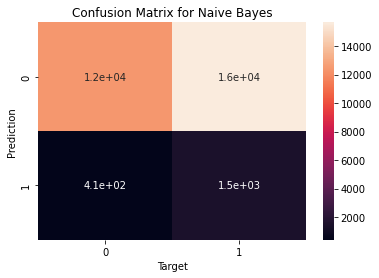

In [28]:
#Confusion Matrix based on Naive bayes classifier
from sklearn.metrics import accuracy_score,confusion_matrix
ac = accuracy_score(target_test,ypred)
print("Accuracy Score:",ac)
cm = confusion_matrix(target_test,ypred)
plt.figure()
sns.heatmap(cm,annot=True)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Confusion Matrix for Naive Bayes')


In [29]:
#Classification report
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
print(classification_report(target_test,ypred))


              precision    recall  f1-score   support

           0       0.97      0.44      0.61     28094
           1       0.09      0.79      0.16      1906

    accuracy                           0.46     30000
   macro avg       0.53      0.61      0.38     30000
weighted avg       0.91      0.46      0.58     30000



In [ ]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(target_test,ypred)
print('accuracy_score on test dataset : ', accuracy_test)
# Accuracy Score on train dataset
accuracy_train = accuracy_score(target_train,ypred_train)
print('accuracy_score on train dataset : ', accuracy_train)

In [46]:
#Hyperparameter parameter tuning
np.logspace(0,-9, num=10)
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV

crossvalidation = RepeatedStratifiedKFold(n_splits=3, 
                                    n_repeats=2)

from sklearn.preprocessing import PowerTransformer
param = {'var_smoothing': np.logspace(0,-9, num=20)}

gaussianNB = GridSearchCV(estimator=model, 
                     param_grid=param, 
                     cv=crossvalidation,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(data_test)

gaussianNB.fit(Data_transformed, target_test);

Fitting 6 folds for each of 20 candidates, totalling 120 fits


In [ ]:
predict_test = gaussianNB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(target_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)
# Accuracy Score on train dataset
accuracy_train = accuracy_score(target_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_test)

accuracy_score on test dataset :  0.5061333333333333


Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtc = DecisionTreeClassifier(criterion='entropy',random_state=3,)

In [32]:
modelDTC = dtc.fit(data_train,target_train)

In [33]:
predDTC = dtc.predict(data_test)

Accuracy Score: 0.9102666666666667


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

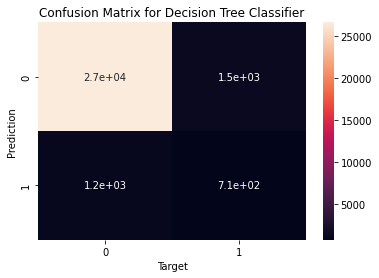

In [34]:
#Confusion Matrix based on Naive bayes classifier
from sklearn.metrics import accuracy_score,confusion_matrix
cmDTC = confusion_matrix(target_test,predDTC)
plt.figure()
sns.heatmap(cmDTC,annot=True)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Confusion Matrix for Decision Tree Classifier')

In [39]:
print("Accuracy score for test data:",modelDTC.score(data_test,target_test)*100)
print("Accuracy score for train data:",modelDTC.score(data_train,target_train)*100)


Accuracy score for test data: 91.02666666666667
Accuracy score for train data: 99.74


In [40]:
#Hyperparameter tuning
for max_d in range(1,21):
  model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
  model.fit(data_train, target_train)
  print('The Training Accuracy for max_depth {} is:'.format(max_d), model.score(data_train, target_train))
  print('The Validation Accuracy for max_depth {} is:'.format(max_d), model.score(data_test,target_test))
  print('')

The Training Accuracy for max_depth 1 is: 0.9412142857142857
The Validation Accuracy for max_depth 1 is: 0.9412

The Training Accuracy for max_depth 2 is: 0.9447285714285715
The Validation Accuracy for max_depth 2 is: 0.9446666666666667

The Training Accuracy for max_depth 3 is: 0.9449428571428572
The Validation Accuracy for max_depth 3 is: 0.9445333333333333

The Training Accuracy for max_depth 4 is: 0.9455857142857143
The Validation Accuracy for max_depth 4 is: 0.9447

The Training Accuracy for max_depth 5 is: 0.9465714285714286
The Validation Accuracy for max_depth 5 is: 0.9452666666666667

The Training Accuracy for max_depth 6 is: 0.9472
The Validation Accuracy for max_depth 6 is: 0.9454666666666667

The Training Accuracy for max_depth 7 is: 0.9477142857142857
The Validation Accuracy for max_depth 7 is: 0.9454333333333333

The Training Accuracy for max_depth 8 is: 0.9483571428571429
The Validation Accuracy for max_depth 8 is: 0.9452

The Training Accuracy for max_depth 9 is: 0.9490

Naive Bayes

1.   Accuracy score: 46.43
2.   Accuracy score after hyperparameter tuning: 50.04

Decision Tree

1.   Accuracy score: 91.02
2.   Accuracy score after hyperparameter tuning: 94.09



